Mounted at /content/drive
Total revenue: 260.5
Top customers:
 Customer
David      122.0
Bob         55.5
Alice       35.0
Eva         34.0
Charlie     14.0
Name: Total, dtype: float64
Top products:
 Product
Chair         85.0
Headphones    45.0
Desk Lamp     44.0
Mouse         37.0
Notebook      31.5
Name: Total, dtype: float64
Revenue by category:
 Category
Electronics     82.0
Furniture      129.0
Stationery      49.5
Name: Total, dtype: float64


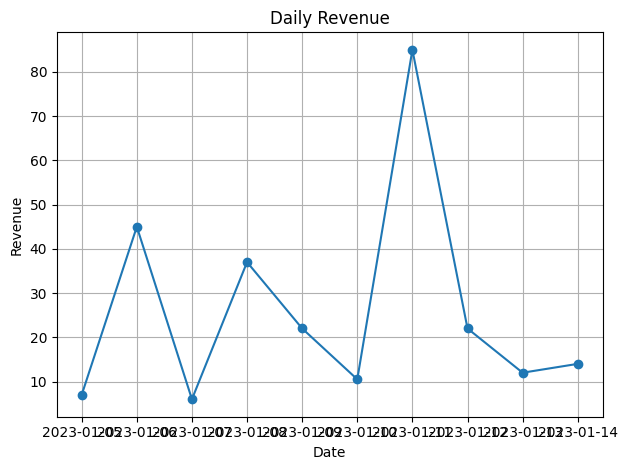

In [1]:

from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data/Orders.csv', parse_dates=['OrderDate'])

# Add Total column
df['Total'] = df['Quantity'] * df['UnitPrice']

# Total revenue
print("Total revenue:", df['Total'].sum())

# Revenue by customer
print("Top customers:\n", df.groupby('Customer')['Total'].sum().sort_values(ascending=False).head(5))

# Revenue by product
print("Top products:\n", df.groupby('Product')['Total'].sum().sort_values(ascending=False).head(5))

# Revenue by category
category_rev = df.groupby('Category')['Total'].sum()
print("Revenue by category:\n", category_rev)

# Daily revenue plot
import matplotlib.pyplot as plt

daily = df.groupby('OrderDate')['Total'].sum()

plt.plot(daily.index, daily.values, marker='o')
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data/daily_revenue.png')
plt.show()

# Export summary
category_rev.to_csv('/content/drive/MyDrive/Data/category_revenue.csv')
